In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
laptop_data = pd.read_csv('laptop.csv', encoding='ISO-8859-1', index_col=0)

laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
laptop_data.shape

(1303, 11)

In [12]:
laptop_data.drop(['Cpu', 'Memory', 'Gpu', 'Weight', 'ScreenResolution'], inplace=True, axis=1)

In [14]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price
92,HP,Notebook,13.3,16GB,Windows 10,63776.1600
758,Dell,Gaming,15.6,16GB,Windows 10,152859.7872
1032,MSI,Gaming,17.3,8GB,Windows 10,63499.1040
1159,HP,2 in 1 Convertible,13.3,8GB,Windows 10,108744.4800
690,Acer,Notebook,14.0,4GB,Chrome OS,19980.0000
1141,MSI,Gaming,15.6,8GB,Windows 10,60888.3840
259,Lenovo,2 in 1 Convertible,15.6,8GB,Windows 10,90522.7200
418,Dell,Notebook,15.6,8GB,Windows 10,28768.5360
1207,Lenovo,Notebook,15.6,4GB,Windows 10,15930.7200
578,MSI,Gaming,17.3,16GB,Windows 10,145401.1200


In [15]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [16]:
laptop_data.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

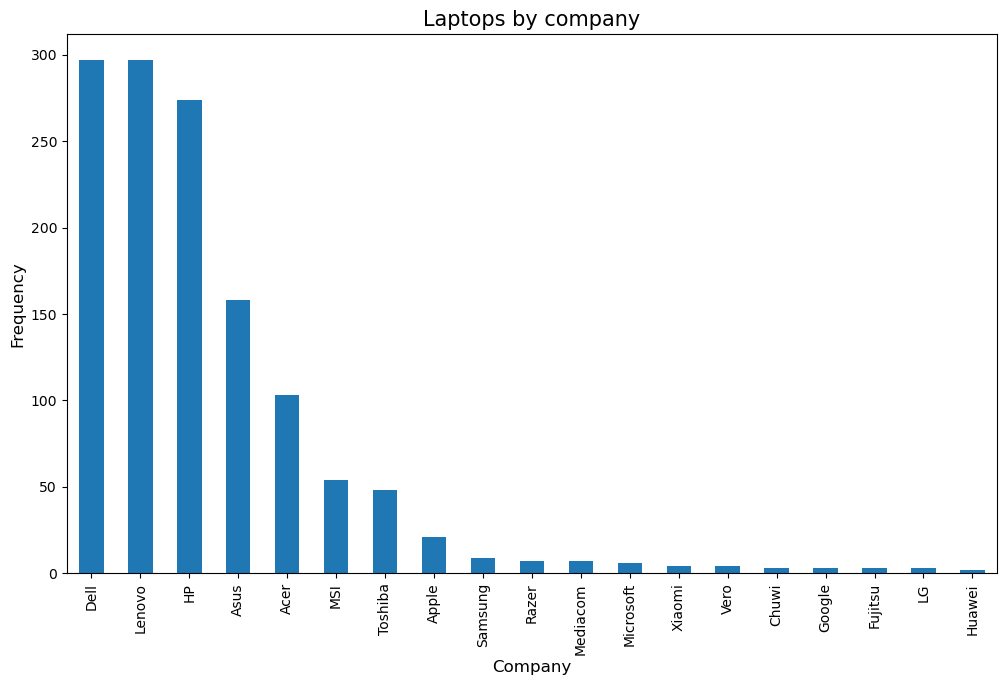

In [25]:
plt.figure(figsize=(12,7))

laptop_data['Company'].value_counts().plot(kind='bar')

plt.title('Laptops by company', fontsize=15)

plt.xlabel('Company',fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<Axes: >

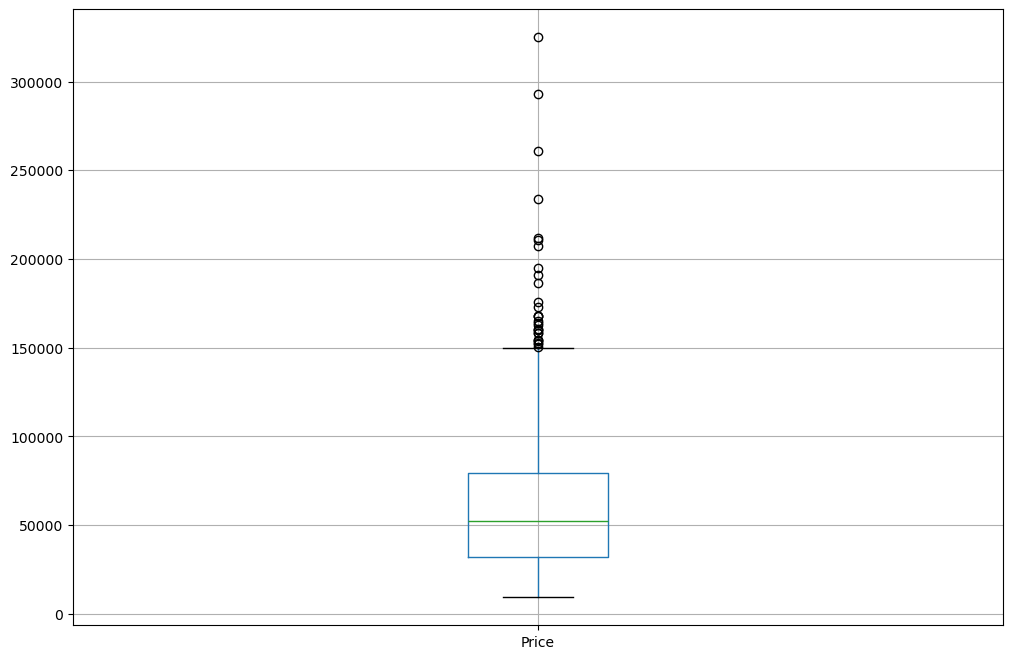

In [29]:
plt.figure(figsize=(12,8))

laptop_data[['Price']].boxplot()

<Axes: title={'center': 'Price'}, xlabel='Company'>

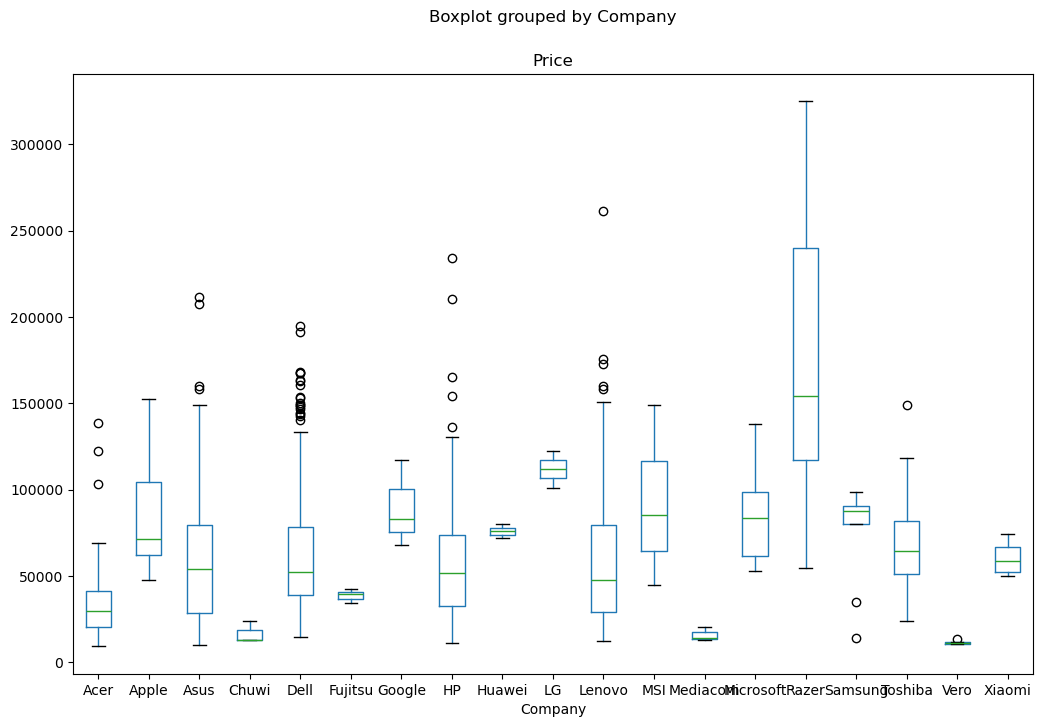

In [30]:
laptop_data.boxplot(by='Company', column=['Price'], grid=False, figsize=(12,8))

C:\Users\offic\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\offic\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


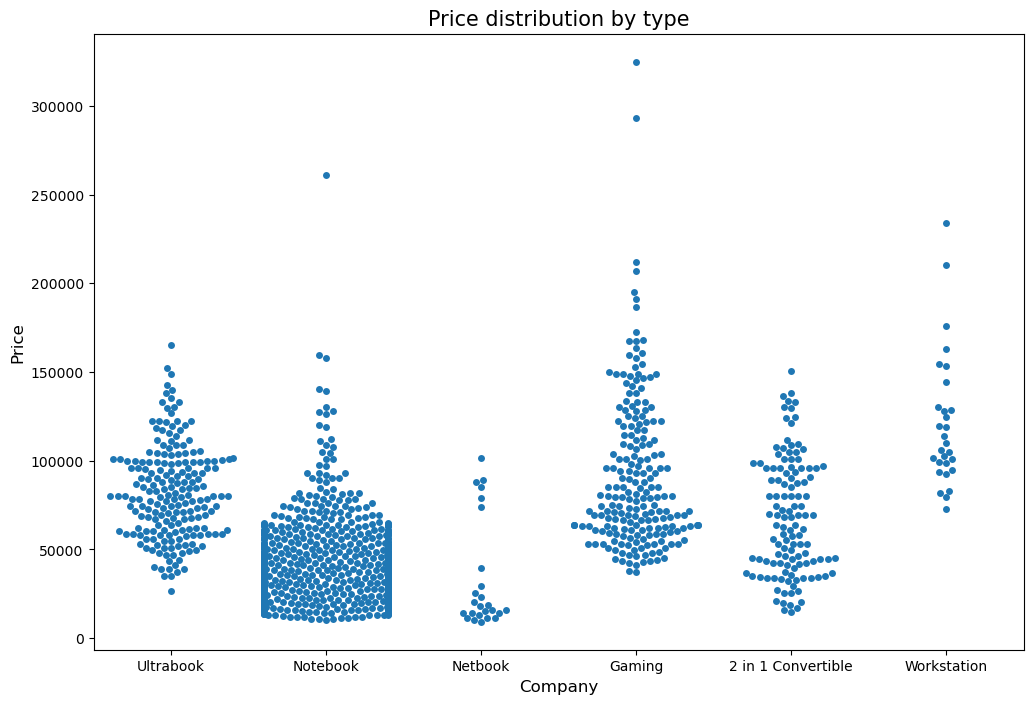

In [33]:
# Using Seaborn

plt.figure(figsize=(12,8))

sns.swarmplot(x='TypeName', y='Price', data=laptop_data)

plt.title('Price distribution by type', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.show()

In [36]:
#Building and training a regrassion model

from sklearn.preprocessing import LabelEncoder

#preparing our data for machine learning 
label_encoder = LabelEncoder() #It will convert the categorical values to numerical values

laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [37]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price
0,Apple,4,13.3,8GB,macOS,71378.6832
1,Apple,4,13.3,8GB,macOS,47895.5232
2,HP,3,15.6,8GB,No OS,30636.0000
3,Apple,4,15.4,16GB,macOS,135195.3360
4,Apple,4,13.3,8GB,macOS,96095.8080


In above, It clearly visible that TypeName got Converted into Integers

In [65]:
# Another way to encode Categorical values to Numerical Values is to use OneHotEncoder
## OneHotEncoder uses 1 and 0 value to indicate presence or absence of a category

## we can perforn OneHotEncoder for all categorical value in our dataframe
dummy_laptop_data = pd.get_dummies(laptop_data)
dummy_laptop_data = dummy_laptop_data.astype(int)
dummy_laptop_data.head()

,TypeName,Inches,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Ram_12GB,Ram_16GB,Ram_24GB,Ram_2GB,Ram_32GB,Ram_4GB,Ram_64GB,Ram_6GB,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,4,13,71378,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4,13,47895,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3,15,30636,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,4,15,135195,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,13,96095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [93]:
dummy_laptop_data.shape

(1303, 40)

In [94]:
# X varriable's or predictors in our regression model so x will be all columns except price column
x = dummy_laptop_data.drop('Price', axis=1)

# Y varriable or the target of our regression is what we are trying to predict 
y = dummy_laptop_data['Price']

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [96]:
x_train.shape, x_test.shape 

((912, 39), (391, 39))

In [97]:
y_train.shape, y_test.shape 

((912,), (391,))

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [99]:
linear_regression.score(x_train, y_train)

0.688086895434314

In [100]:
y_pred = linear_regression.predict(x_test)

r2_score(y_test, y_pred)

0.6191234754133597

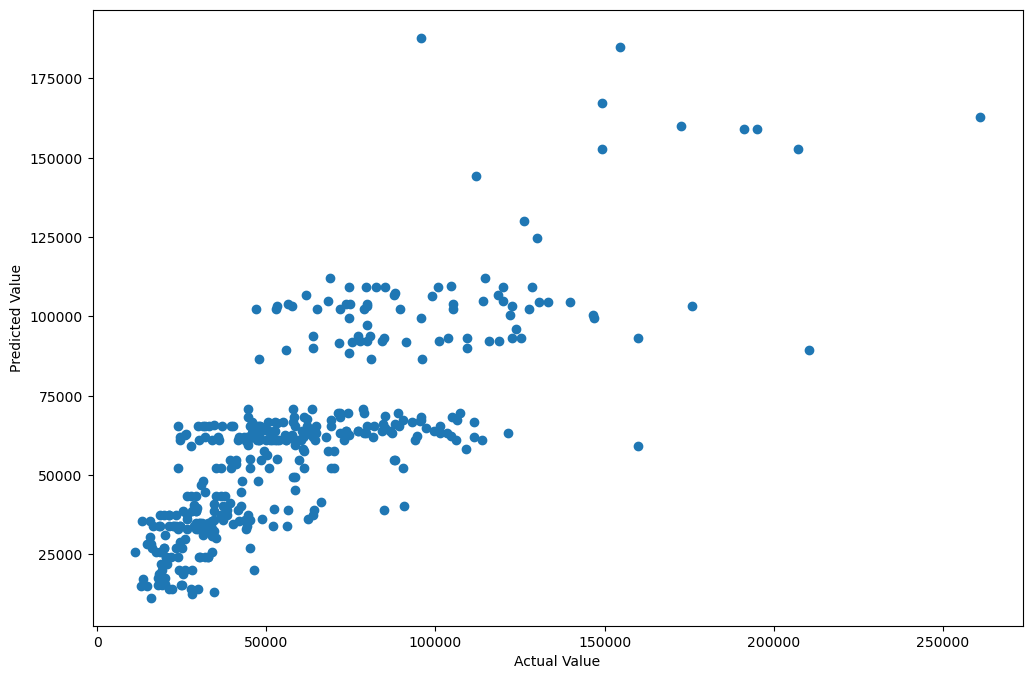

In [101]:
plt.figure(figsize = (12,8))

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()